Purpose: Using intramodular connectivity calculated using WGCNA, find the hub genes for each module.<br>
Author: Anna Pardo<br>
Date initiated: Apr. 6, 2024

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
import numpy as np

In [2]:
# import intramodular connectivity data
intconn = pd.read_csv("../../data/WGCNA_Apr2024/intramodular_connectivity.txt",sep="\t",header="infer")
intconn.head()

,kTotal,kWithin,kOut,kDiff
Zm00001eb000010,249.283457,48.087192,201.196265,-153.109074
Zm00001eb000020,971.549351,466.238844,505.310507,-39.071664
Zm00001eb000050,162.663357,69.849981,92.813376,-22.963395
Zm00001eb000060,284.511877,147.776343,136.735534,11.040809
Zm00001eb000070,213.675985,81.939023,131.736962,-49.797939


In [3]:
intconn = intconn.reset_index()
intconn.head()

,index,kTotal,kWithin,kOut,kDiff
0,Zm00001eb000010,249.283457,48.087192,201.196265,-153.109074
1,Zm00001eb000020,971.549351,466.238844,505.310507,-39.071664
2,Zm00001eb000050,162.663357,69.849981,92.813376,-22.963395
3,Zm00001eb000060,284.511877,147.776343,136.735534,11.040809
4,Zm00001eb000070,213.675985,81.939023,131.736962,-49.797939


In [4]:
intconn = intconn.rename(columns={"index":"GeneID"})

In [5]:
# import module membership information
modgenes = json.load(open("../../data/WGCNA_Apr2024/genes_in_modules.json"))

In [6]:
# add a Module column to intconn
mods = []
for g in list(intconn["GeneID"]):
    for m in modgenes.keys():
        l = modgenes[m]
        if g in l:
            mods.append(m)
intconn["Module"] = mods

In [7]:
intconn.head()

,GeneID,kTotal,kWithin,kOut,kDiff,Module
0,Zm00001eb000010,249.283457,48.087192,201.196265,-153.109074,cyan
1,Zm00001eb000020,971.549351,466.238844,505.310507,-39.071664,yellow
2,Zm00001eb000050,162.663357,69.849981,92.813376,-22.963395,blue
3,Zm00001eb000060,284.511877,147.776343,136.735534,11.040809,blue
4,Zm00001eb000070,213.675985,81.939023,131.736962,-49.797939,blue


In [8]:
# intramodular connectivity column=kWithin

# for each module: pull out the top 10 genes with highest intramodule connectivity
hubs = []

for m in list(modgenes.keys()):
    df = intconn[intconn["Module"]==m]
    dfsort = df.sort_values(by="kWithin",axis=0,ascending=False)
    top10 = dfsort.head(n=10)
    hubs.append(top10[["GeneID","kWithin","Module"]])

In [9]:
hubdf = pd.concat(hubs)

(array([3.370e+02, 1.080e+03, 3.297e+03, 3.533e+03, 3.676e+03, 3.035e+03,
        2.401e+03, 1.975e+03, 1.540e+03, 1.202e+03, 1.003e+03, 7.890e+02,
        7.520e+02, 6.170e+02, 5.640e+02, 6.040e+02, 5.280e+02, 4.780e+02,
        4.670e+02, 3.840e+02, 3.690e+02, 3.420e+02, 3.470e+02, 2.950e+02,
        2.990e+02, 2.510e+02, 2.730e+02, 2.520e+02, 2.060e+02, 2.190e+02,
        2.020e+02, 2.320e+02, 2.120e+02, 1.870e+02, 2.310e+02, 2.210e+02,
        2.380e+02, 2.140e+02, 2.060e+02, 2.160e+02, 2.090e+02, 1.920e+02,
        1.820e+02, 1.790e+02, 2.030e+02, 1.680e+02, 1.490e+02, 1.380e+02,
        1.440e+02, 1.510e+02, 1.350e+02, 1.400e+02, 1.150e+02, 1.210e+02,
        1.100e+02, 1.170e+02, 1.090e+02, 1.130e+02, 9.200e+01, 8.200e+01,
        8.000e+01, 8.200e+01, 6.500e+01, 7.100e+01, 6.900e+01, 6.600e+01,
        6.500e+01, 6.400e+01, 6.100e+01, 6.300e+01, 4.700e+01, 4.200e+01,
        4.600e+01, 4.200e+01, 3.800e+01, 3.800e+01, 2.300e+01, 2.400e+01,
        1.500e+01, 1.000e+01, 7.000e+0

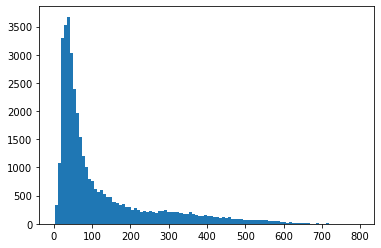

In [10]:
# re-identify hub genes using a kWithin threshold
## plot histogram of kWithin
plt.hist(intconn["kWithin"],bins=100)

In [11]:
# load in module membership data
mm = pd.read_csv("../../data/WGCNA_Apr2024/module_membership_values.tsv",sep="\t",header="infer")
mm.head()

,kMElightcyan,kMElightyellow,kMEcyan,kMEgrey60,kMEwhite,kMEdarkturquoise,kMEblack,kMEpurple,kMEdarkorange,kMElightgreen,...,kMEdarkgrey,kMEyellow,kMEblue,kMEturquoise,kMEdarkgreen,kMEgreenyellow,kMEmagenta,kMEpink,kMEgreen,kMEorange
Zm00001eb000010,0.209479,0.278678,0.639044,0.519908,-0.073136,-0.048976,-0.140545,-0.080542,0.006679,-0.060440,...,0.070571,-0.140368,0.286817,-0.053109,-0.154964,-0.251675,-0.124777,-0.183529,0.220727,0.101337
Zm00001eb000020,-0.141907,-0.199604,-0.405262,-0.312205,0.004068,0.037612,0.265745,0.243109,0.037551,0.145255,...,0.066782,0.870825,0.385045,0.628949,0.315934,0.509063,0.199057,0.254119,-0.120331,0.072725
Zm00001eb000050,-0.011442,-0.008251,0.021882,0.022546,-0.026577,-0.016136,-0.006816,-0.004185,0.339589,0.079563,...,0.062933,0.181654,0.272448,0.150270,0.028503,0.072555,0.026548,0.068687,0.070430,0.073366
Zm00001eb000060,0.011123,0.008629,0.066725,0.194707,-0.071828,-0.037536,-0.015161,0.118981,0.063739,0.154270,...,0.086104,0.314781,0.449725,0.229460,0.086049,0.112554,0.101167,0.030478,0.061792,0.109339
Zm00001eb000070,-0.025418,0.043771,0.121261,-0.155817,-0.047998,-0.008611,-0.060942,0.009771,0.182184,0.007630,...,0.098064,0.047879,0.221466,0.261658,-0.098312,-0.118672,-0.065270,-0.067950,0.468175,0.097666


In [12]:
mm = mm.reset_index().rename(columns={"index":"GeneID"})

In [13]:
intconn.head()

,GeneID,kTotal,kWithin,kOut,kDiff,Module
0,Zm00001eb000010,249.283457,48.087192,201.196265,-153.109074,cyan
1,Zm00001eb000020,971.549351,466.238844,505.310507,-39.071664,yellow
2,Zm00001eb000050,162.663357,69.849981,92.813376,-22.963395,blue
3,Zm00001eb000060,284.511877,147.776343,136.735534,11.040809,blue
4,Zm00001eb000070,213.675985,81.939023,131.736962,-49.797939,blue


In [14]:
# make a gene-to-module dictionary
gtm = {}
for i in range(len(intconn.index)):
    gtm[intconn.iloc[i,0]] = intconn.iloc[i,5]

In [15]:
# wrangle the data such that there are three columns: gene ID, kME, and module
## each gene should show the kME only from its own module
dfdict = {"GeneID":[],"kME":[],"Module":[]}
for g in list(mm["GeneID"].unique()):
    module = gtm[g]
    col = "kME"+module
    dfdict["kME"].append(abs(list(mm.loc[mm['GeneID'] == g, col])[0]))
    dfdict["GeneID"].append(g)
    dfdict["Module"].append(module)

In [16]:
mmdf = pd.DataFrame(dfdict)

In [17]:
mmdf.head()

,GeneID,kME,Module
0,Zm00001eb000010,0.639044,cyan
1,Zm00001eb000020,0.870825,yellow
2,Zm00001eb000050,0.272448,blue
3,Zm00001eb000060,0.449725,blue
4,Zm00001eb000070,0.221466,blue


(array([591., 615., 591., 538., 500., 495., 509., 468., 472., 427., 394.,
        440., 419., 394., 385., 374., 360., 322., 328., 338., 321., 329.,
        297., 297., 307., 315., 274., 249., 276., 275., 293., 257., 268.,
        294., 285., 282., 274., 282., 288., 292., 282., 273., 314., 318.,
        308., 351., 374., 355., 395., 384., 375., 465., 449., 508., 469.,
        511., 522., 527., 541., 529., 557., 551., 530., 527., 555., 554.,
        554., 534., 579., 524., 552., 530., 497., 523., 520., 488., 514.,
        482., 455., 401., 392., 374., 346., 318., 296., 245., 255., 216.,
        201., 194., 181., 156., 146., 122.,  93.,  80.,  53.,  38.,  64.,
         54.]),
 array([3.20625670e-06, 9.98525365e-03, 1.99673011e-02, 2.99493484e-02,
        3.99313958e-02, 4.99134432e-02, 5.98954906e-02, 6.98775380e-02,
        7.98595854e-02, 8.98416328e-02, 9.98236802e-02, 1.09805728e-01,
        1.19787775e-01, 1.29769822e-01, 1.39751870e-01, 1.49733917e-01,
        1.59715965e-01, 1.6969

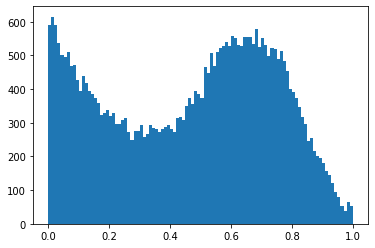

In [18]:
plt.hist(mmdf["kME"],bins=100)

In [19]:
threshold = mmdf["kME"].quantile(q=0.95)
threshold

0.8577860811168114

In [20]:
# find hub genes based on the threshold
hubgenes = mmdf[mmdf["kME"]>threshold]

In [21]:
len(hubgenes.index)

1861

In [22]:
# load in the core gene information dataframes
psyn_cg_info = pd.read_csv("../../data/core_genes_psyn_info_30-Mar-2024.tsv",sep="\t",header="infer")
all_cg_info = pd.read_csv("../../data/core_genes_all_info_30-Mar-2024.tsv",sep="\t",header="infer")

In [23]:
# append columns stating whether the hub gene is in each core set
achub = []
pchub = []
for g in list(hubgenes["GeneID"]):
    if g in list(psyn_cg_info["GeneID"]):
        pchub.append("Y")
    else:
        pchub.append("N")
    if g in list(all_cg_info["GeneID"]):
        achub.append("Y")
    else:
        achub.append("N")

In [24]:
hubgenes["iscore_psyn"] = pchub
hubgenes["iscore_all"] = achub

/tmp/ipykernel_152/3507479965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hubgenes["iscore_psyn"] = pchub
/tmp/ipykernel_152/3507479965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hubgenes["iscore_all"] = achub


In [25]:
psynhubs = hubgenes[hubgenes["iscore_psyn"]=="Y"]
allhubs = hubgenes[hubgenes["iscore_all"]=="Y"]

In [26]:
len(psynhubs.index)

26

In [27]:
len(allhubs.index)

14

In [28]:
# do Fisher's exact test: is this more than we'd expect by chance?
def data_setup(coregenelist):
    coreornot = []
    hubornot = []
    for g in list(gid["GeneID"]):
        if g in list(hubgenes["GeneID"]):
            hubornot.append("Yes")
        else:
            hubornot.append("No")
        if g in coregenelist:
            coreornot.append("Yes")
        else:
            coreornot.append("No")
    gid["isHub"] = hubornot
    gid["isCore"] = coreornot
    return gid

In [29]:
def run_fisher(coregenelist):
    df = data_setup(coregenelist)
    # set up the table for Fisher's exact test
    data = pd.crosstab(index=df["isHub"],columns=df["isCore"])
    print(data)
    # run Fisher's exact test
    odds_ratio, p_value = stats.fisher_exact(data)
    print('odds ratio is : ' + str(odds_ratio))
    print('p_value is : ' + str(p_value))
    return (odds_ratio, p_value)

In [30]:
# load tpm (note this is not corrected in any way)
tpm = pd.read_csv("../../data/rawtpm_bptreat_noPEG.tsv",sep="\t",header="infer")

In [31]:
ttpm = tpm.set_index("Sample").drop(["BioProject","Treatment"],axis=1).transpose().reset_index().rename(columns={"index":"GeneID"})
gid = pd.DataFrame(ttpm["GeneID"])

In [32]:
run_fisher(list(psyn_cg_info["GeneID"].unique()))

isCore     No  Yes
isHub             
No      36657  486
Yes      1835   26
odds ratio is : 1.0687052174790594
p_value is : 0.7535984624205736


(1.0687052174790594, 0.7535984624205736)

In [33]:
run_fisher(list(all_cg_info["GeneID"].unique()))

isCore     No  Yes
isHub             
No      36413  730
Yes      1847   14
odds ratio is : 0.37808960847282896
p_value is : 3.9776509334214846e-05


(0.37808960847282896, 3.9776509334214846e-05)

### April 10, 2024


In [37]:
# pull out the lists of psynhubs & allhubs gene IDs
corehubs = {"Photosynthetic":list(psynhubs["GeneID"].unique()),"All":list(allhubs["GeneID"].unique())}

In [39]:
psyn_cg_info[psyn_cg_info["GeneID"].isin(corehubs["Photosynthetic"])]

,GeneID,Name,Upregulated,Downregulated,From_RF,From_Set_Ops
8,Zm00001eb144770,NaN,N,Y,N,Y
15,Zm00001eb379240,ferredoxin NADP reductase3,N,Y,N,Y
39,Zm00001eb287640,NaN,Y,N,Y,N
40,Zm00001eb064990,NaN,N,Y,Y,N
42,Zm00001eb346800,NaN,N,Y,N,Y
62,Zm00001eb061670,NaN,N,Y,Y,N
63,Zm00001eb299760,photosystem II oxygen evolving polypeptide2,N,Y,N,Y
91,Zm00001eb056210,NaN,N,Y,Y,N
102,Zm00001eb080840,glyceraldehyde-3-phosphate dehydrogenase1,N,Y,N,Y
122,Zm00001eb002270,glyceraldehyde phosphate dehydrogenase B1,N,Y,N,Y


In [40]:
all_cg_info[all_cg_info["GeneID"].isin(corehubs["All"])]

,GeneID,Name,Upregulated,Downregulated,From_RF,From_Set_Ops
85,Zm00001eb002270,glyceraldehyde phosphate dehydrogenase B1,N,Y,N,Y
172,Zm00001eb418610,"heat shock protein, 90 kDa",Y,Y,Y,N
273,Zm00001eb392300,NaN,Y,N,Y,N
333,Zm00001eb360100,NaN,Y,Y,Y,N
335,Zm00001eb055330,actin9,Y,Y,Y,N
343,Zm00001eb409220,photosystem I N subunit2,N,Y,N,Y
347,Zm00001eb180950,NaN,Y,N,N,Y
442,Zm00001eb254240,NaN,Y,N,N,Y
509,Zm00001eb402590,NaN,Y,Y,Y,N
542,Zm00001eb185020,NaN,Y,Y,Y,N


In [41]:
tf = pd.read_csv("../../data/data.csv",sep=",",header="infer")
pctf = pd.read_csv("../../data/psyn_core_genes_TFs.tsv",sep="\t",header="infer")
actf = pd.read_csv("../../data/allsamp_core_genes_TFs.tsv",sep="\t",header="infer")

In [42]:
pctf.head()

,number for sorting purposes,protein name,family,gene ID,synonym,clone,all gene IDs,Unnamed: 7
0,34,ZmABI34,ABI3-VP1,Zm00001eb022070,ABI34,pUT3981,Zm00001d029749 GRMZM2G125095 Zm00001eb022070,NaN
1,59,ZmABI59,ABI3-VP1,Zm00001eb343850,NaN,NaN,GRMZM2G413647 Zm00001d009582 Zm00001eb343850,NaN
2,10151,ZmEREB92,AP2/ERF-AP2,Zm00001eb352580,ZmERFAP2_2,pUT6815,GRMZM2G174347 Zm00001eb352580 Zm00001d000339,NaN
3,20054,ZmEREB54,AP2/ERF-ERF,Zm00001eb413930,EREB54,pUT6542,GRMZM2G020054 Zm00001d024324 Zm00001eb413930,NaN
4,20056,ZmEREB56,AP2/ERF-ERF,Zm00001eb269420,DBP4,pUT6401,Zm00001eb269420 GRMZM2G380377 Zm00001d036003,NaN


In [43]:
pctf[pctf["gene ID"].isin(corehubs["Photosynthetic"])]

,number for sorting purposes,protein name,family,gene ID,synonym,clone,all gene IDs,Unnamed: 7


In [44]:
actf[actf["gene ID"].isin(corehubs["All"])]

,number for sorting purposes,protein name,family,gene ID,synonym,clone,all gene IDs,Unnamed: 7


In [47]:
hubtfs = tf[tf["gene ID"].isin(list(hubgenes["GeneID"].unique()))]